<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Code-in-Python/blob/master/03_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bi means two, so Bivariate Analysis meaning two variable analysis
# Column can be of two types - 1. Continuous and 2. Categorical
# So Bivariate Analysis can be of THREE TYPES
# 1. Continuous vs Continuous - Correlation Coefficient
# 2. Categorical vs Categorical - Chi Square Test
# 3. Categorical vs Continuous - T Test(N < 30), Z Test(N > 30) & ANOVA

In [2]:
# Libraries 
from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Iris Dataset for Classification
# Load Dataset
iris = datasets.load_iris()
# Convert to DataFrame
iris_pd = pd.DataFrame(iris.data)
# Feature Name
iris_pd.columns = iris.feature_names
# Target Variable
iris_pd["Class"] = iris.target
# iris_pd is the final dataset

# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target

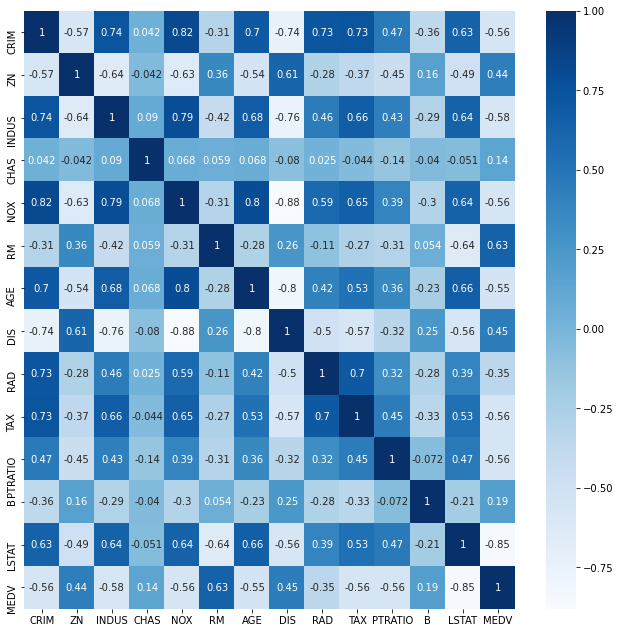

In [4]:
# 1 . Continuous Vs Continuous - Correlation Coefficient 

# Correlation find the exact value of strength in the relationship and the direction as well
# Range is from -1 to +1
# +ve value suggest they are positively correlated
# -ve value suggest they are negatively correlated

# 2 Methods are use to calculate Correlation Coefficient - 1. Pearson and 2. Spearman
# Pearson correlation coefficient: Assume data follows Normal Distribution and works well with linear data
# Spearman correlation coefficient: Don't assume any distribution. Works well with both linear & non-linear
# By default while calculating, pearson method is used

#Increasing the size of the plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11)) # Sample figsize in inches, change the number accordingly
sns.heatmap(boston_pd.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# MEDV and LSTAT is having -0.85, we might need to remove one variable

In [5]:
# Correlation Coefficient Takeway :

# In general situation, when we have two independent variables which are very highly correlated
# we should remove one of them because we don't want to run into Multicollinearity issue
# & Regression model's regression coefficient will also become unreliable for those variables
# In short we are not adding incremental information but infusing the model with noise

# If we want to keep highly correlated variable then use PCA instead of Regression

In [6]:
# 2. Categorical vs Categorical - Chi Square Test

# Chi Square test determines the association between categorical variables
# Value = 0, shows complete dependency between two categorical variables
# Value = 1, shows categorical variables are completely independent

iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Datatypes
print("Datatypes of IRIS Dataset")
iris_pd.dtypes

Datatypes of IRIS Dataset


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int64
dtype: object

In [8]:
# So as we can observe all are continuous variable
# First we need to create categorical variables

# For this we will choose two variables. They are "Class" and "petal width (cm)".
# So we will create two bins name 'LOW' and 'HIGH'
# 'LOW' means value less than Median and 'HIGH' means value more than Median
# For this we will choose one column i.e, 'petal width (cm)'

iris_pd['petal width (cm)'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

In [9]:
# So Median is 1.3
bin_label = ['LOW','HIGH']
iris_pd['Bin_Petal_Width'] = pd.qcut(iris_pd['petal width (cm)'],q=[0,0.5,1],labels=bin_label)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,LOW
1,4.9,3.0,1.4,0.2,0,LOW
2,4.7,3.2,1.3,0.2,0,LOW
3,4.6,3.1,1.5,0.2,0,LOW
4,5.0,3.6,1.4,0.2,0,LOW


In [10]:
# Frequency Count
iris_pd['Bin_Petal_Width'].value_counts()

LOW     78
HIGH    72
Name: Bin_Petal_Width, dtype: int64

In [11]:
# Convert Target Column to Categorical
iris_pd['Class'] = iris_pd['Class'].astype('category')
# So Datatype is
print("FINAL DATATYPES ")
iris_pd.dtypes

FINAL DATATYPES 


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
Class                category
Bin_Petal_Width      category
dtype: object

In [12]:
# Now we can check Interaction Effect between Class and Bin_Petal_Width through Chi Square Test
# First Create Contigency Table
contingency_table = pd.crosstab(iris_pd['Bin_Petal_Width'],iris_pd['Class'])
print(contingency_table)

Class             0   1   2
Bin_Petal_Width            
LOW              50  28   0
HIGH              0  22  50


In [13]:
# Chi Square Test
# So we took two categorical columns - Petal Width(Bins) and Class

# Chi Square Hypothesis :
# Null hypothesis - Petal Width (Bins) has no affect on Class
# Alternate hypothesis - Petal Width (Bins) has some affect on Class

In [14]:
# Chi Square Test
from scipy import stats
chi2_stat,p_val,dof,ex = stats.chi2_contingency(contingency_table)
print("CHI-SQUARE TEST VALUES")
print("Chi Square Value : ",chi2_stat)
print("Degree of Freedom : ",dof)
print("P Value : ", p_val)
print("Contigency Table")
ex

# Inference :
# P-Value is 1.339^-22 which is quite smaller than threshold value of 5%(95% Confidence)
# This enable us to REJECT NULL HYPOTHESIS and ACCEPT ALTERNATE HYPOTHESIS
# In other word, Petal Width(Bins) has impact on Class
# And we can also say Petal Width(Bins) is a good predictor for Class

CHI-SQUARE TEST VALUES
Chi Square Value :  100.64102564102565
Degree of Freedom :  2
P Value :  1.3998417931687032e-22
Contigency Table


array([[26., 26., 26.],
       [24., 24., 24.]])

In [15]:
# 3) Categorical and Numerical Columns - T Test, Z Test and ANOVA

# Z Test(n > 30), T Test(n < 30) and ANNOVA
# Z Test and T Test are basically same
# They assess whether the average of two groups are statistically different from each other
# This analysis is appropiate from comparing the average of a numerical variables 
# for two categories of a categorical variable

# If the probability of Z is small, difference between two average is more significant 
# T Test is used when n =< 30, we use Z Test when n > 30 and n is Number of samples

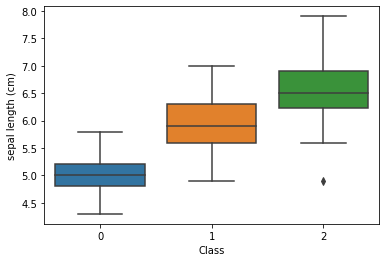

In [16]:
# Continuous Column to do analysis - Sepal Length (cm)
# Categorical Column to do analysis - Class

# Null Hypothesis : 
  # Sepal Length has NO AFFECT on Class
  # There is no statistically difference between Speal Length values for Various Class

# Alternate Hypothesis :
  # Sepal Length has SOME AFFECT on Class
  # There is difference between Observed Sepal Length values for Various Class

# Lets plot the boxplot
sns.boxplot(x = 'Class', y = 'sepal length (cm)', data = iris_pd)

In [17]:
# Use Z Test
print("Number of samples in the set : ",len(iris_pd))
print("Therefore USE Z TEST")

ztest, pval = stests.ztest(iris_pd['Class'],iris_pd['sepal length (cm)'],alternative='two-sided')
print("Z Test Value is ",ztest)
print("P Value is ",pval)

# Inference :
# P Value is less than 0.05 so REJECT NULL HYPOTHESIS
# In other word, Sepal Length can be a good predictor for Class

Number of samples in the set :  150
Therefore USE Z TEST
Z Test Value is  -50.92447470978208
P Value is  0.0


In [18]:
# ANOVA Test
# T or Z test works while dealing with two groups
# ANOVA help us to compare more than two groups at the same time
# If we use t-test then we need to carry out seperate t-test for each pair of group
# In short ANOVA help us to compare multiple group at the same time 

# Considering two Categorical columns for the analysis i.e, bins (Sepal Width & Petal Width)
# For Petal Width, Binning is already done
# For Sepal Width,
iris_pd['Bin_Sepal_Width'] = pd.qcut(iris_pd['sepal width (cm)'],q=[0,0.5,1],labels = bin_label)
# Remove the space and other symbols in Column name to use in a model
iris_pd.columns = iris_pd.columns.str.replace(' ','')
iris_pd.columns = iris_pd.columns.str.replace('(cm)','')
iris_pd.columns = iris_pd.columns.str.replace('[^a-zA-z]','')

iris_pd['Class'] = iris_pd['Class'].astype('int')

# Building Regression model
model = ols('Class ~ C(Bin_Petal_Width) *C(Bin_Sepal_Width)',iris_pd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.55e-48
Time:                        12:44:41   Log-Likelihood:                -67.119
No. Observations:                 150   AIC:                             142.2
Df Residuals:                     146   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.7778      0.064     12.163      0.000       0.651       0.904
C(Bin_Petal_Width)[T.HIGH]                                0.9243      0.085     10.878      0.000       0.756       1.092
C(Bin_Sepal_Width)[T.HIGH]                               -0.7778      0.087     -8.925      0.000      -0.950      -0.606
C(Bin_Petal_Width)[T.HIGH]:C(Bin_Sepal_Width)[T.HIGH]     0.7557      0.129      5.862      0.000       0.501       1.010
==============================================================================
Omnibus:                       25.008   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.614
Skew:                          -1.154   Prob(JB):                     5.02e-08
Kurtosis:                       2.776   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Anova Output
sm.stats.anova_lm(model,typ = 2) # Type = 2 because of two independent columns
# F = Between Group Variability / Within Group Variability

# Inference : 
# P Value is less than 0.05, so we REJECT NULL HYPOTHESIS
# Therefore we can say Bins in the Petal Width and Sepal Width on Class is statistically significant

,sum_sq,df,F,PR(>F)
C(Bin_Petal_Width),56.590258,1.0,384.430208,9.721071e-43
C(Bin_Sepal_Width),6.675232,1.0,45.346339,3.528236e-10
C(Bin_Petal_Width):C(Bin_Sepal_Width),5.059254,1.0,34.368636,2.919685e-08
Residual,21.492009,146.0,NaN,NaN
